# Zomato - Exploratory Data Analysis

## Problem Statement

The zomato exploratory data analysis is for the foodies to find the best restaurants, value for money restaurants in their locality. It also helps to find their required cuisines in their locality.  

## Data Definition

**res_id**: The code given to a restaurant (Categorical) 

**name**: Name of the restaurant (Categorical)

**establishment**: Represents the type of establishment (Categorical)

**url**: The website of the restaurant (Categorical)

**address**: The address of the restaurant (Categorical)

**city**: City in which the restaurant located (Categorical)

**city_id**: The code given to a city (Categorical)

**locality**: Locality of the restaurant (Categorical)

**latitude**: Latitude of the restaurant (Categorical)

**longitude**: Longitude of the restaurant (Categorical)

**zipcode**: Zipcode of the city in which the restaurant located (Categorical)

**country_id**: Country code in which the restaurant located (Categorical)

**locality_verbose**: Locality along with the city in which the restaurant located (Categorical)

**cuisines**: The cuisines a restaurant serves (Categorical)

**timings**: The working hours of a restaurant (Categorical)

**average_cost_for_two**: The average amount expected for 2 people (Numerical)

**price_range**: The categories for average cost (Categories - 1,2,3,4) (Categorical)

**currency**: The currency in which a customer pays (Categorical)

**highlights**: The facilities of the restaurant (Categorical)

**aggregate_rating**: The overall rating a restaurant has got (Numerical) 

**rating_text**: Categorized ratings (Categorical)

**votes**: Number of votes received by the restaurant from customers (Numerical)

**photo_count**: The number of photos of a restaurant (Numerical)

**opentable_support**: Restaurant reservation from Opentable (Categorical)

**delivery**: The restaurant deliver an order or not (Categorical)

**takeaway**: The restaurant allows  a 'takeaway' of an order or not (Categorical)

## Table of Contents

1. **[Import Libraries](#import_lib)** 
2. **[Read Data](#Read_Data)** 
3. **[Understand  and Prepare the Data](#Understand_Data)**
4. **[Understand the variables](#Understanding_variables)**
5. **[Check for Missing Values](#missing)**
6. **[Study Correlation](#correlation)**
7. **[Detect Outliers](#outliers)**
8. **[Create a new variable 'region'](#region)**
9. **[Some more analysis](#more)** 


<a id='import_lib'></a>
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import geopandas 
import matplotlib.pyplot as plt
import seaborn as sns

Inference- 
Importing the needed libraries namely numpy,pandas,geopandas, matplotlib

<a id='Read_Data'></a>
## 2. Read Data

In [2]:
#reaeding the data from the csv file
data=pd.read_csv("ZomatoRestaurantsIndia.csv")

In [3]:
#displaying the first 5 rows of the dataframe 
data.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


Inference- 

Reading the data and displaying the first few rows of the frame for understanding the data

<a id = 'Understanding_variables'> </a>
## 3. Understanding the variables

**1. Variable 'name'**

In [4]:
data.name

0                            Bikanervala
1         Mama Chicken Mama Franky House
2                          Bhagat Halwai
3                          Bhagat Halwai
4            The Salt Cafe Kitchen & Bar
                       ...              
211939    Kali Mirch Cafe And Restaurant
211940                        Raju Omlet
211941                  The Grand Thakar
211942                            Subway
211943        Freshcos - The Health Cafe
Name: name, Length: 211944, dtype: object

Inference- 
    
    This column states the names of all the restaurants registered with zomato in india 

**2. Variable 'establishment'**

In [5]:
data.establishment

0           Quick Bites
1           Quick Bites
2           Quick Bites
3           Quick Bites
4         Casual Dining
              ...      
211939    Casual Dining
211940      Quick Bites
211941    Casual Dining
211942      Quick Bites
211943             Café
Name: establishment, Length: 211944, dtype: object

In [6]:
#finding out the unique values in the column
data.establishment.unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', nan, 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

Inference- 
    
    This columns indicates the type of offerings restaurant are offering : quick biting, casual dining, cafe and so on

**3. Variable 'city'**

In [7]:
data.city

0             Agra
1             Agra
2             Agra
3             Agra
4             Agra
            ...   
211939    Vadodara
211940    Vadodara
211941    Vadodara
211942    Vadodara
211943    Vadodara
Name: city, Length: 211944, dtype: object

Inference-
        
    The cities in the dataset across India
        

**Let us find the count of restaurants in each city**

In [8]:
data.city.value_counts()

Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: city, Length: 98, dtype: int64

Inference-

      Counting the no.of restaurants in a specific city in india with the help of value_counts() function of pandas

**4. Variable 'locality'**

In [9]:
data.locality

0            Khandari
1          Agra Cantt
2            Shahganj
3         Civil Lines
4             Tajganj
             ...     
211939      Fatehgunj
211940     Karelibaug
211941       Alkapuri
211942          Akota
211943       Vadiwadi
Name: locality, Length: 211944, dtype: object

Inference-

        Understanding the locality where the restaurant is situated

**4. Variable 'latitude'**

From the variable 'latitude', we know the latitudinal location of the restaurant

The Latitudinal extent of India 8º4‛N to 37º6‛ N. 

We must check whether we have any points beyond this extent.

- We need to replace all these values with NaN's.

- check if the values are replace by NaN's

- We see all the values are replaced by NaN's

In [10]:
data.latitude

0         27.211450
1         27.160569
2         27.182938
3         27.205668
4         27.157709
            ...    
211939    22.336931
211940    22.322455
211941    22.310563
211942    22.270027
211943    22.309935
Name: latitude, Length: 211944, dtype: float64

Inference-

        reading the latitudes

In [11]:
#checking for total null values in the column
data.latitude.isna().sum()

0

In [17]:
#filtering out the values outside of India
data.latitude=data.latitude.astype('float64')
data.loc[(data.latitude<8.4)| (data.latitude >37.6),['latitude']]=None

Inference-

        This shows that if a latitude is not within the given paramaters we can say that it does not lie in the indian subcontinent and hence we can replace those values by null values since they are not benificial for us

In [18]:
#post the filtering, we can say out 1339 are outliers
data.latitude.isna().sum()

1339

**5. Variable 'longitude'**

From the variable 'longitude', we know the longitudinal location of the restaurant

The Longitudinal extent of India is from 68°7'E to 97°25'E

We must check whether we have any points beyond this extent.

- We need to replace all these values with NaN's.

- Check if the values are replace by NaN's

- From variable 'latitude' and 'longitude', plot the location of restaurants.

In [19]:
data.longitude

0         78.002381
1         78.011583
2         77.979684
3         78.004799
4         78.052421
            ...    
211939    73.192356
211940    73.197203
211941    73.171164
211942    73.143068
211943    73.158768
Name: longitude, Length: 211944, dtype: float64

Inference-

        reading the longtitude

In [20]:
#checking for total null values in the column
data.longitude.isna().sum()

0

In [21]:
#filtering out the values outside of India
data.longitude=data.longitude.astype('float64')
data.loc[(data.longitude<68.7)| (data.longitude >97.25),['longitude']]=None

Inference-

        This shows that if a longitude is not within the given paramaters we can say that it does not lie in the indian subcontinent and hence we can replace those values by null values since they are not benificial for us

In [22]:
#post the filtering, we can say out 1329 are outliers
data.longitude.isna().sum()

1329

## GeoPlotting the Co-ordinates of the Restaurants

<AxesSubplot:>

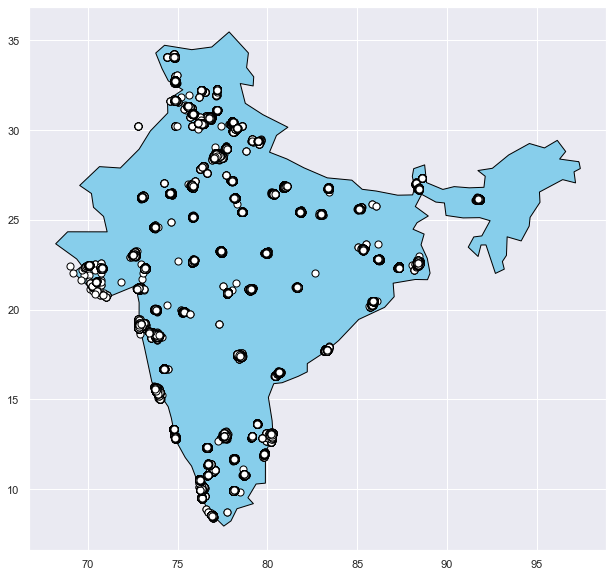

In [162]:
#creating a geopandas dataframe using the lat, long co-ordinates 
gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))

#reading the world geo-map datafile from geopandas library
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#filtering out the values from the world where the country is -> India 
ax_val = world[world.name == 'India'].plot(color='skyblue', edgecolor='black', linewidth=1)

#plotting the dataframe as geo-map
gdf.plot(ax=ax_val,color ='white',markersize=50, edgecolor= 'black')

Inference- 

        Plotting the various coordinates of the restaurants across India 
        
        The dots indicate the various locations where the restaurants are situated

**6. Variable 'cuisines'**

In [25]:
data.cuisines

0         North Indian, South Indian, Mithai, Street Foo...
1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                         Fast Food, Mithai
3                 Desserts, Bakery, Fast Food, South Indian
4                        North Indian, Continental, Italian
                                ...                        
211939                                         North Indian
211940                                            Fast Food
211941                      Gujarati, North Indian, Chinese
211942                           Fast Food, Sandwich, Salad
211943                           Cafe, Healthy Food, Coffee
Name: cuisines, Length: 211944, dtype: object

Inference- 

        Cuisines are the various types of foods offered by the various restaurants

- To find the unique cusines we write a small user defined function.



In [36]:
def frequency_calculator(x):
    'takes input of data of various cuisines, returns unique cuisines present in the respective dataframe provided'
    save_cuisines=(list(map(str,(x))))
    result_cuisines=set()
    for row_of_cuisine in save_cuisines:
        distributed_cuisines=(row_of_cuisine.split(", "))
        for each_cuisine in distributed_cuisines:
            result_cuisines.add(each_cuisine)
    return (result_cuisines)

Inference- 

        Function for finding out unique cuisines

- find out the frequency of each cuisine

In [37]:
#splitting the cuisines for finding individuals cuisines
result_cuisines=frequency_calculator(data.cuisines)

In [38]:
#declaring an array
count_of_each_cusine=[]

#creating an empty dataframe 
df_cuisine=pd.DataFrame(result_cuisines,columns=['Cuisines'])

#caluclating count of each 
for each_cuisine in result_cuisines:
    count_of_each_cusine.append(data['cuisines'].str.count(each_cuisine).sum())

#creating a data frame with the freq of each cuisine
df_cuisine['Frequency']=count_of_each_cusine

In [39]:
df_cuisine

,Cuisines,Frequency
0,Raw Meats,163.0
1,Chettinad,1279.0
2,African,16.0
3,South Indian,28895.0
4,Ice Cream,7193.0
...,...,...
129,Grill,29.0
130,Singaporean,127.0
131,Brazilian,11.0
132,International,3.0


Inference- 

        Finding the top cuisines over india 
        Showing the top cuisines based on the no.of restaurants that offer them (i.e their frequency)

**8. Variable 'average_cost_for_two'**

In [40]:
data.average_cost_for_two

0          700
1          600
2          300
3          300
4         1000
          ... 
211939     600
211940     300
211941     700
211942     500
211943     600
Name: average_cost_for_two, Length: 211944, dtype: int64

Inference- 

        Getting the idea how much would it cost for two people to have food at that restaurant

**9. Variable 'price_range'**

In [41]:
data.price_range

0         2
1         2
2         1
3         1
4         3
         ..
211939    2
211940    1
211941    2
211942    2
211943    2
Name: price_range, Length: 211944, dtype: int64

Inference- 

        Understanding the price range and trying to make an better understanding of how costly is the restaurant

- visualize a exploded pie chart.

<AxesSubplot:ylabel='price_range'>

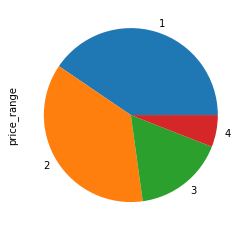

In [42]:
data.price_range.value_counts().plot.pie()

Inference- 

        Understanding the price range of the restaurants and analysing the no.of restaurants in a particular price range

**10. Variable 'highlights'**

In [43]:
data.highlights

0         Lunch, Takeaway Available, Credit Card, Dinner...
1         Delivery, No Alcohol Available, Dinner, Takeaw...
2         No Alcohol Available, Dinner, Takeaway Availab...
3         Takeaway Available, Credit Card, Lunch, Delive...
4         Lunch, Serves Alcohol, Cash, Credit Card, Dinn...
                                ...                        
211939    Dinner, Cash, Lunch, Delivery, Indoor Seating,...
211940    Dinner, Cash, Takeaway Available, Debit Card, ...
211941    Dinner, Cash, Debit Card, Lunch, Takeaway Avai...
211942    Dinner, Delivery, Credit Card, Lunch, Cash, Ta...
211943    Dinner, Cash, Takeaway Available, Debit Card, ...
Name: highlights, Length: 211944, dtype: object

Inference- 

        Understanding the various important aspects of the restaurant



- write a small function to know the number of times a facility has appeared in the 'Highlights'.

Inference- 

        Function for getting the unique cuisines all over India

In [44]:
result_highlights=frequency_calculator(data.highlights)

In [45]:
#declaring an array
count_of_each_highlight=[]

#creating an empty dataframe 
df_highlights=pd.DataFrame(result_highlights,columns=['Facility_Provided'])

#caluclating count of each 
for each_highlight in result_highlights:
    count_of_each_highlight.append(data['highlights'].str.count(each_highlight).sum())

#creating a data frame with the freq of each cuisine
df_highlights['Frequency']=count_of_each_highlight

In [46]:
df_highlights

,Facility_Provided,Frequency
0,Dark Kitchen,48.0
1,Axis Bank - Dining Delights,5550.0
2,Lunch Menu,769.0
3,Pool Table,379.0
4,Credit Card,121873.0
...,...,...
99,Smoking Area,20530.0
100,Cash,203036.0
101,Gastro Pub,469.0
102,Indoor Seating,175396.0


Inference- 

        Finding the frequency of the various facilities offered by the restaurants over India

- Now we find out which facility occurs most number of in the data.

In [47]:
df_highlights.sort_values(by=['Frequency'],ascending=False).reset_index(drop=True).head(1)

,Facility_Provided,Frequency
0,Cash,203036.0


Inference- 

        we understand that cash is the most frequent facility offered by the restaurants

**11. Variable 'aggregate_rating'** 



In [52]:
data.aggregate_rating

0         4.4
1         4.4
2         4.2
3         4.3
4         4.9
         ... 
211939    4.1
211940    4.1
211941    4.0
211942    3.7
211943    4.0
Name: aggregate_rating, Length: 211944, dtype: float64

Inference- 

        Understanding the rating of the restaurants on a scale of 1-5 

**12. Variable 'rating_text'**



In [53]:
data.rating_text

0         Very Good
1         Very Good
2         Very Good
3         Very Good
4         Excellent
            ...    
211939    Very Good
211940    Very Good
211941    Very Good
211942         Good
211943    Very Good
Name: rating_text, Length: 211944, dtype: object

Inference- 

        understanding the rating of the restaurant in descriptive format

Creating a New feature for better understanding of ratings


In [54]:
#creating a new column rating_text_new using the aggregate_rating column data
data.loc[((data.aggregate_rating>=0) & (data.aggregate_rating<=1)),'rating_text_new']='poor'
data.loc[((data.aggregate_rating>=1) & (data.aggregate_rating<=2)),'rating_text_new']='average'
data.loc[((data.aggregate_rating>=2) & (data.aggregate_rating<=3)),'rating_text_new']='good'
data.loc[((data.aggregate_rating>=3) & (data.aggregate_rating<=4)),'rating_text_new']='very good'
data.loc[((data.aggregate_rating>=4) & (data.aggregate_rating<=5)),'rating_text_new']='excellent'

In [55]:
#finding out the unique ratings for the newly created column
data['rating_text_new'].unique()

array(['excellent', 'very good', 'poor', 'good', 'average'], dtype=object)

Inference- 
        
        Creating a new column with range defined from 0 to 5 in five parts and assining each range an ordinal value

**13. Variable 'votes'**

In [56]:
data.votes

0          814
1         1203
2          801
3          693
4          470
          ... 
211939     243
211940     187
211941     111
211942     128
211943      93
Name: votes, Length: 211944, dtype: int64

Inference- 
    
    This shows the votes that are given to the restaurants by the customers visiting it

**14. Variable 'photo_count'**

In [57]:
data.photo_count

0         154
1         161
2         107
3         157
4         291
         ... 
211939     40
211940     40
211941     38
211942     34
211943     53
Name: photo_count, Length: 211944, dtype: int64

Inference- 
    
    This shows what are the no.of photos that uploaded by the customers visting the restaurant

**15. Variable 'delivery'**

In [58]:
data.delivery

0        -1
1        -1
2         1
3         1
4         1
         ..
211939   -1
211940    1
211941   -1
211942    1
211943    1
Name: delivery, Length: 211944, dtype: int64

Inference- 
    
    This shows what type of restaurant is it namely does it delivery (1) or it does not deliver (-1)

<a id ='missing'></a>
## 4. Check for missing values

In [59]:
data.isna().sum()

res_id                       0
name                         0
establishment             4827
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                  1339
longitude                 1329
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                2069
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
geometry                     0
rating_text_new              0
dtype: int64

Inference- 
    
    This shows what are the various values in the dataset having null values
    
    one can observe the zipcode column has 163187 null values which is about 2/3rd of the dataset 
    
    highlights, estabhlishment can be replaced with the help of mode value 
    
    latitude & longtitude have null val showing out of India range
    
    some of the addresses are also not there

**6. Study summary statistics**

Let us check the summary statistics for numerical variables.

In [60]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,210605.000000,210615.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.586832,78.104827,1.0,595.812229,1.882535,3.395937,378.002571,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,6.823595,4.286852,0.0,606.239363,0.892989,1.283642,925.333106,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,8.400144,69.014446,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.545368,74.892431,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.541707,77.434536,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.847055,80.221799,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,34.214702,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


Inference- 
    
    This shows what are the the most extreme values in the data set (the maximum and minimum values), the lower and upper quartiles, and the median

<a id='Understand_Data'></a>
## 5. Understand  and Prepare the Data

Brief Context : 

→ A well-prepared data proves beneficial for analysis as it limits errors and inaccuracies that can occur during analysis. The processed data is easily accessible to use and also for manipulations moving ahead. 

→ Data preparation is often a lengthy process, but it is essential as a prerequisite to put data in context to get insights and eliminate bias resulting from poor data quality.

Tasks Performed : 

1. **Check dimensions of the dataframe**
2. **Analysing the head of the data**
3. **Note the redundant variables and drop them** 
4. **Check the data types. Refer to data definition to ensure your data types are correct. If data types are not as per business context, change the data types as per requirement** 
5. **Check for duplicates**

#### Check dimensions of the dataframe in terms of rows and columns

In [61]:
data.shape

(211944, 28)

Inference drawn: 
    
    The no.of rows are 211944
    
    The no.of columns are 26

##### Analysing the head of the data

In [62]:
data.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,geometry,rating_text_new
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1,POINT (78.00238 27.21145),excellent
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1,POINT (78.01158 27.16057),excellent
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1,POINT (77.97968 27.18294),excellent
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1,POINT (78.00480 27.20567),excellent
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1,POINT (78.05242 27.15771),excellent


Inference -

    There are 26 columns in the dataset, which help one to understand more about how Sales of Zomato is influenced and affected with respect to these

**3. Note the redundant variables and drop them**

The variables are 

1) country_id - since focus is only for the country India and hence country_id is same everywhere

2) locality_verbose - address parameter is already given 

3) currency - since it is only for India, the currency is constant

4) Opentable_support - all various are 0 hence can be dropped

In [63]:
data=data.drop(['country_id','locality_verbose','currency','opentable_support'],axis=1)

In [64]:
data.shape

(211944, 24)

Inference- 

checking to undersand if the columns were droppped or not
We can see that the columns reduced to 22 from 26

**4. Check the data types. Refer to data definition to ensure your data types are correct. If data types are not as per business context, change the data types as per requirement**


In [65]:
data.dtypes

res_id                     int64
name                      object
establishment             object
url                       object
address                   object
city                      object
city_id                    int64
locality                  object
latitude                 float64
longitude                float64
zipcode                   object
cuisines                  object
timings                   object
average_cost_for_two       int64
price_range                int64
highlights                object
aggregate_rating         float64
rating_text               object
votes                      int64
photo_count                int64
delivery                   int64
takeaway                   int64
geometry                geometry
rating_text_new           object
dtype: object

Inference- 

checking the datatype of the dataset

#### Change the incorrect data type

In [66]:
#TO CATEGORICAL FORMAT
cols=data.select_dtypes(include='object').columns.to_list()
data[cols]=data[cols].astype('category')

#TO NUMERICAL FORMAT
data.average_cost_for_two=data.average_cost_for_two.astype('int64')
data.aggregate_rating=data.aggregate_rating.astype('float64')
data.photo_count=data.photo_count.astype('int64')
data.votes=data.votes.astype('int64')

#printing the refined data types
data.dtypes

res_id                     int64
name                    category
establishment           category
url                     category
address                 category
city                    category
city_id                    int64
locality                category
latitude                 float64
longitude                float64
zipcode                 category
cuisines                category
timings                 category
average_cost_for_two       int64
price_range                int64
highlights              category
aggregate_rating         float64
rating_text             category
votes                      int64
photo_count                int64
delivery                   int64
takeaway                   int64
geometry                geometry
rating_text_new         category
dtype: object

Inference- 

* the datatypes were changed according to the business requirements into the two types- categorial/numerical

**5. Check for Duplicates**

In [67]:
#this is done based on all columns in the data
data_duplicated=data[data.duplicated()]
data_duplicated

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,geometry,rating_text_new
101,3400059,Peshawri - ITC Mughal,Fine Dining,https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.161150,78.043993,...,4,"Lunch, Cash, Credit Card, Dinner, Debit Card, ...",4.4,Very Good,353,154,-1,-1,POINT (78.04399 27.16115),excellent
116,3400060,Taj Bano - ITC Mughal,Fine Dining,https://www.zomato.com/agra/taj-bano-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.161132,78.044022,...,4,"Credit Card, Lunch, Cash, Debit Card, Dinner, ...",4.3,Very Good,96,205,-1,-1,POINT (78.04402 27.16113),excellent
140,3400017,Pinch Of Spice,Casual Dining,https://www.zomato.com/agra/pinch-of-spice-civ...,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Agra,34,Civil Lines,27.201735,78.007625,...,4,"Lunch, Delivery, Credit Card, Dinner, Cash, Ta...",4.6,Excellent,915,105,1,-1,POINT (78.00762 27.20173),excellent
141,3400018,Pinch Of Spice,Casual Dining,https://www.zomato.com/agra/pinch-of-spice-taj...,"1076/2, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.159649,78.043304,...,4,"Delivery, Dinner, Cash, Credit Card, Debit Car...",4.6,Excellent,965,690,1,-1,POINT (78.04330 27.15965),excellent
142,3400850,Urban Deck,Casual Dining,https://www.zomato.com/agra/urban-deck-2-civil...,"5th Floor, The P L Palace Hotel, MG Road, Sanj...",Agra,34,Civil Lines,27.199573,78.003699,...,4,"Dinner, Cash, Debit Card, Takeaway Available, ...",4.3,Very Good,672,192,1,-1,POINT (78.00370 27.19957),excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211937,18855810,Biryani aur Baatein,Casual Dining,https://www.zomato.com/vadodara/biryani-aur-ba...,"Shop 14, Atlantis K-10, A Wing, Genda Circle R...",Vadodara,32,Alkapuri,22.317746,73.168043,...,2,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.1,Very Good,154,96,-1,-1,POINT (73.16804 22.31775),excellent
211938,18662583,Wok On Fire,Casual Dining,https://www.zomato.com/vadodara/wok-on-fire-fa...,"Ground Floor 1, Rossette Building, Opposite Se...",Vadodara,32,Fatehgunj,22.323357,73.187461,...,3,"Dinner, Cash, Debit Card, Lunch, Takeaway Avai...",4.0,Very Good,301,126,1,-1,POINT (73.18746 22.32336),excellent
211939,3202251,Kali Mirch Cafe And Restaurant,Casual Dining,https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,"Dinner, Cash, Lunch, Delivery, Indoor Seating,...",4.1,Very Good,243,40,-1,-1,POINT (73.19236 22.33693),excellent
211941,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171164,...,2,"Dinner, Cash, Debit Card, Lunch, Takeaway Avai...",4.0,Very Good,111,38,-1,-1,POINT (73.17116 22.31056),excellent


Inference-
    
    We can understand that there are about 151533 rows in the dataset having some/all values as repeated values 

<a id = 'correlation'> </a>
## 7. Study correlation

<AxesSubplot:>

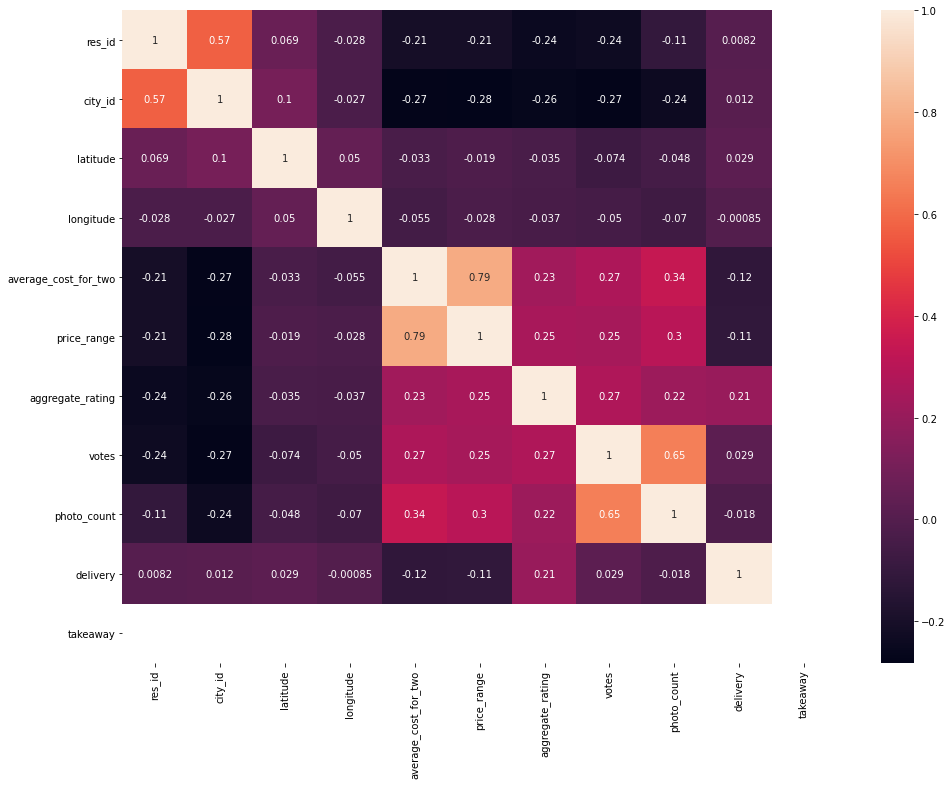

In [68]:
import seaborn as sns
corr=data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr,annot=True)

Inference- 
    
    This shows what is the correlation between the various columns in the dataset 
    for example -
    
    *photo counts and votes are highly correlated
    
    *votes and latitude are negative correlated
    
    *votes and average cost for two people have a low correlation


## 8. Detect outliers

<AxesSubplot:>

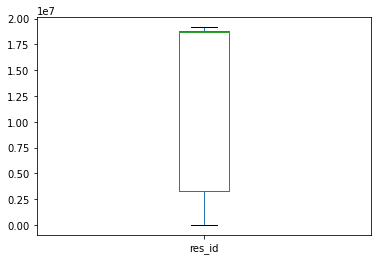

In [69]:
data.res_id=data.res_id.astype('int64')
data['res_id'].plot.box()

Inference- 
    
    This shows res_id does not have outliers

<AxesSubplot:>

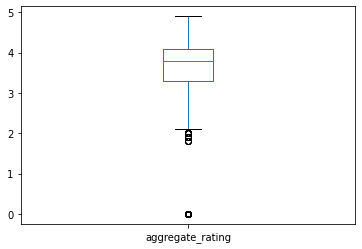

In [70]:
data['aggregate_rating'].plot.box()

Inference- 
    
    This shows aggregate rating has a few outliers rest of the data is in the interquantile range

<a id='region'> </a>
## 9. Create a new variable 'region'


In [76]:
east_zone=['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim' , 'Tripura','Bihar', 'Orissa', 'Jharkhand', 'West Bengal ']

west_zone=['Rajasthan' , 'Gujarat', 'Goa', 'Maharashtra', 'Daman and Diu',
'Dadra and Nagar Haveli','Madhya Pradesh','Chhattisgarh']

north_zone=['Jammu and Kashmir', 'Himachal Pradesh','Chandigarh','Delhi', 'Punjab', 'Uttarakhand' , 'Uttar Pradesh','Haryana']

south_zone=['Andhra Pradesh', 'Karnataka', 'Kerala','Tamil Nadu','Telangana','puducherry']


Inference- 
    
    Understanding the various states in each zone

Create a variable 'region' with four categories 'northern','eastern', 'southern', 'western' and 'central'. To do so, use the 'city' column, group all cities belonging to the same region. 

In [77]:
dict_region={'Agra':"north", 'Ahmedabad':'west', 'Ajmer':'west', 'Alappuzha':'south', 'Allahabad':'north', 'Amravati':"west",
       'Amritsar':'north', 'Aurangabad':'west', 'Bangalore':'south', 'Bhopal':'west', 'Bhubaneshwar':'east',
       'Chandigarh':'north', 'Chennai':'south', 'Coimbatore':'south', 'Cuttack':'east', 'Darjeeling':'east',
       'Dehradun':'north', 'Dharamshala':'north', 'Faridabad':"north", 'Gandhinagar':"west", 'Gangtok':'east',
       'Ghaziabad':"north", 'Goa':"west", 'Gorakhpur':"north", 'Greater Noida':"north", 'Guntur':"south",
       'Gurgaon':"north", 'Guwahati':"east", 'Gwalior':"east", 'Haridwar':"north", 'Howrah':"east",
       'Hyderabad':"south", 'Indore':"west", 'Jabalpur':"west", 'Jaipur':"west", 'Jalandhar':"north", 'Jammu':"north",
       'Jamnagar':"west", 'Jamshedpur':"east", 'Jhansi':"north", 'Jodhpur':"west", 'Junagadh':"west",
       'Kanpur':"north", 'Kharagpur':"east", 'Kochi':"south", 'Kolhapur':"west", 'Kolkata':"east", 'Kota':"west",
       'Lucknow':"north", 'Ludhiana':"north", 'Madurai':"south", 'Manali':"north", 'Mangalore':"south", 'Manipal':"south",
       'Meerut':"north", 'Mohali':"north", 'Mumbai':"west", 'Mussoorie':"north", 'Mysore':"south", 'Nagpur':"west",
       'Nainital':"north", 'Nashik':"west", 'Navi Mumbai':"west", 'Nayagaon':"north", 'Neemrana':"west",
       'New Delhi':"north", 'Noida':"north", 'Ooty':"south", 'Palakkad':"south", 'Panchkula':"north", 'Patiala':"north",
       'Patna':"north", 'Puducherry':"south", 'Pune':"west", 'Pushkar':"west", 'Raipur':"west", 'Rajkot':"west",
       'Ranchi':"east", 'Rishikesh':"north", 'Salem':"south", 'Secunderabad':"south", 'Shimla':"north",
       'Siliguri':"east", 'Srinagar':"north", 'Surat':"west", 'Thane':"west", 'Thrissur':"south", 'Tirupati':"south",
       'Trichy':'south', 'Trivandrum':'south', 'Udaipur':'west', 'Udupi':"south", 'Vadodara':"west", 'Varanasi':"north",
       'Vellore':"south", 'Vijayawada':"south", 'Vizag':"south", 'Zirakpur':"north"}

Inference- 
    
    creating a mapping of city -> region 

In [78]:
data.drop(data[data.city=='north'].index,inplace=True)

for each_region in dict_region : 
    data.loc[data['city']==each_region,'region'] = dict_region[each_region]

In [79]:
data.region

0         north
1         north
2         north
3         north
4         north
          ...  
211939     west
211940     west
211941     west
211942     west
211943     west
Name: region, Length: 211944, dtype: object

Inference- 
    
    This shows creating a new column named as REGION depecting the region in which the city is situated

In [80]:
region_wise_city_distribution =data.groupby('region')['city'].unique()

region_wise_city_distribution

region
east     ['Bhubaneshwar', 'Cuttack', 'Darjeeling', 'Gan...
north    ['Agra', 'Allahabad', 'Amritsar', 'Chandigarh'...
south    ['Alappuzha', 'Bangalore', 'Chennai', 'Coimbat...
west     ['Ahmedabad', 'Gandhinagar', 'Ajmer', 'Amravat...
Name: city, dtype: object

Inference- 
    
    This groups the cities lying in the same region together

<a id='more'> </a>
## 10. Some more Analysis

<b>Lets us explore the data some more now that we have extrapolated and removed the missing values <br>
We now conduct analysis to compare the regions.</b>

### 1. To find which cities have expensive restaurants 

-  plot the cities which have costliest restaurants. 

In [81]:
data[['name','city','average_cost_for_two','price_range']].head(100)

,name,city,average_cost_for_two,price_range
0,Bikanervala,Agra,700,2
1,Mama Chicken Mama Franky House,Agra,600,2
2,Bhagat Halwai,Agra,300,1
3,Bhagat Halwai,Agra,300,1
4,The Salt Cafe Kitchen & Bar,Agra,1000,3
...,...,...,...,...
95,Culinary Junction By Udupi,Agra,800,3
96,Chopstix,Agra,600,2
97,Bhagwati Dhaba,Agra,200,1
98,Chainess,Agra,200,1


Inference- 
    
    This shows getting the name of the restaurant, the city, the average cost, the price range

In [86]:
costliest_cities =data[['city','average_cost_for_two']].groupby(['city']).mean()

top_5_costly_cites =costliest_cities.sort_values(by=['average_cost_for_two'],ascending=False).head(5)

top_5_costly_cites['city']=top_5_costly_cites.index

top_5_costly_cites

,average_cost_for_two,city
city,,
Mumbai,1388.994921,Mumbai
New Delhi,1379.698826,New Delhi
Gurgaon,1333.906977,Gurgaon
Bangalore,1036.187890,Bangalore
Pune,979.858904,Pune


Inference-

        Obtaining the top5 cities having the highest avgerage cost for two people

<AxesSubplot:xlabel='city'>

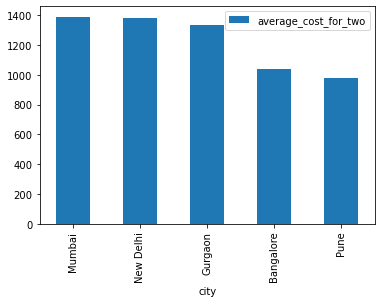

In [98]:
top_5_costly_cites.plot(x='city',y='average_cost_for_two',kind='bar')

Inference-

        plotting a graph for better understanding

### 2.  Comparing regions

### 2a. Highlights available in restaurants for different regions

To cater our analysis we define the regions as nothern, eastern, western and southern.

We first need to select the unique facilities available in each region and sort according to their frequencies.

**Highlights of the northern region**

In [99]:
data_high_north=(data[['highlights']][data.region=='north'])
ans_north=(frequency_calculator(data_high_north.highlights))
store_inter_north=[]

df_highlights_north=pd.DataFrame(ans_north,columns=['Facility'])

for i in ans_north:
    store_inter_north.append(data_high_north['highlights'].str.count(i).sum())

df_highlights_north['frequency']=store_inter_north
df_highlights_north.sort_values(by=['frequency'],ascending=False).reset_index(drop=True)

,Facility,frequency
0,Cash,58515.0
1,Takeaway Available,53133.0
2,Indoor Seating,50291.0
3,Dinner,50027.0
4,Lunch,49720.0
...,...,...
91,Wine Tasting,6.0
92,Unlimited Pizza,5.0
93,Couple Entry Only,3.0
94,Members Only,2.0


Inference-

        Getting the highest frequency facility used in North region 

#### Plot the barplot for different regions

We shall now plot the graphs for top 10 highlights.

<AxesSubplot:xlabel='Facility', ylabel='frequency'>

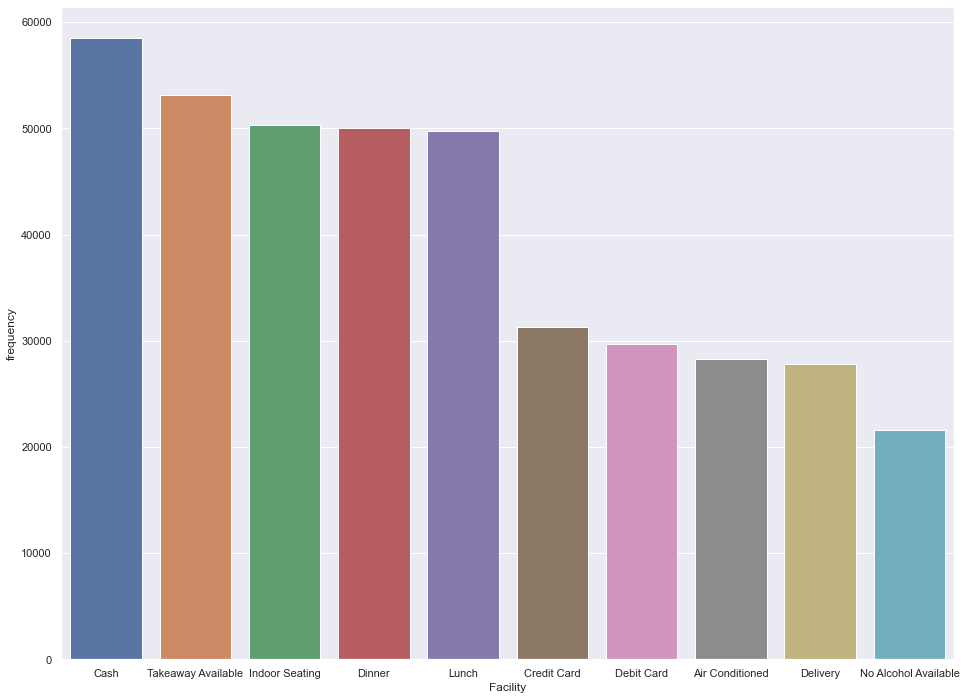

In [149]:
#for NORTH

import seaborn as sns
f, ax = plt.subplots(figsize=(16, 12))
save_north=df_highlights_north.sort_values(by=['frequency'],ascending=False).head(10)
sns.barplot(x='Facility',y='frequency',data=save_north)

Inference-

        Plotting the graphs for the respective regions namely - NORTH for top 10 facilities used in these regions


### 2b. Cuisines available in restaurants for different regions

**Cuisines in the northern region**

In [102]:
data_cui_north=(data[['cuisines']][data.region=='north'])
ans_north=(frequency_calculator(data_cui_north.cuisines))
store_inter_north=[]

df_cui_north=pd.DataFrame(ans_north,columns=['cuisines'])

for i in ans_north:
    store_inter_north.append(data_cui_north['cuisines'].str.count(i).sum())

df_cui_north['frequency']=store_inter_north
df_cui_north.sort_values(by=['frequency'],ascending=False).reset_index(drop=True)

,cuisines,frequency
0,Indian,34304.0
1,North Indian,28006.0
2,Chinese,16763.0
3,Fast Food,15757.0
4,Continental,7389.0
...,...,...
109,South American,2.0
110,Pan Asian,1.0
111,Cafe Food,1.0
112,Swedish,1.0


Inference-

        Getting the highest frequency of cuisine in north region 

- Plot the barplot for top 10 cuisines served in the north region

<AxesSubplot:xlabel='cuisines', ylabel='frequency'>

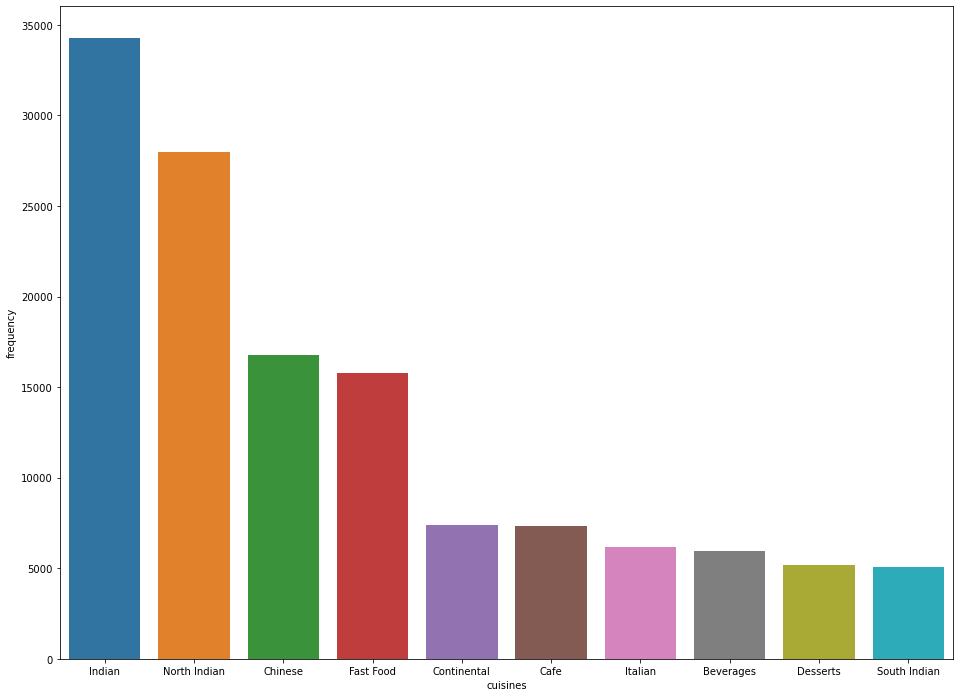

In [103]:
#for NORTH
import seaborn as sns
f, ax = plt.subplots(figsize=(16, 12))
save_north=df_cui_north.sort_values(by=['frequency'],ascending=False).head(10)
sns.barplot(x='cuisines',y='frequency',data=save_north)

Inference-

        Plotting the graphs for the respective regions namely - NORTH for top 10 cuisines used in these regions

The top 10 cuisines served in Restaurants

In [104]:
df_cui_north.sort_values(by=['frequency'],ascending=False).reset_index(drop=True).head(10)

,cuisines,frequency
0,Indian,34304.0
1,North Indian,28006.0
2,Chinese,16763.0
3,Fast Food,15757.0
4,Continental,7389.0
5,Cafe,7319.0
6,Italian,6167.0
7,Beverages,5927.0
8,Desserts,5183.0
9,South Indian,5093.0


Inference-

        Getting the highest frequency of cuisine in north region 

**2. Do restaurants with more photo counts and votes have better rating?**

In [105]:
data_north=data[data.region=='north']
data_north.head(5)

data_north[['aggregate_rating','rating_text','photo_count','votes']].sort_values(by=['photo_count','votes'],ascending=False).reset_index(drop=True).head(30)

,aggregate_rating,rating_text,photo_count,votes
0,4.2,Very Good,17702,4899
1,4.2,Very Good,17702,4899
2,4.2,Very Good,17702,4899
3,4.2,Very Good,17702,4899
4,4.2,Very Good,17702,4899
5,4.2,Very Good,17702,4899
6,4.2,Very Good,17702,4899
7,4.2,Very Good,17702,4899
8,4.7,Excellent,15545,3322
9,4.7,Excellent,15545,3322


Inference- 
            
            By observing the table above one can understand that if the photo counts and votes are higher than the rating text is either - "Very good" or "Excellent" and also the rating is above 4.2 which is a high rating.

    Hence,it is safe to say restaurants with more photo counts and votes have better rating.

- Plot a boxplots for the above table

In [108]:
data_for_boxplot=data_north[['aggregate_rating','photo_count','votes']]

<AxesSubplot:xlabel='photo_count', ylabel='aggregate_rating'>

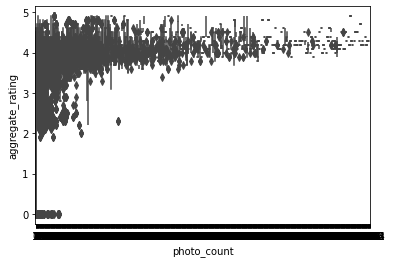

In [109]:
sns.boxplot(x='photo_count',y='aggregate_rating',data=data_for_boxplot)

<AxesSubplot:xlabel='votes', ylabel='aggregate_rating'>

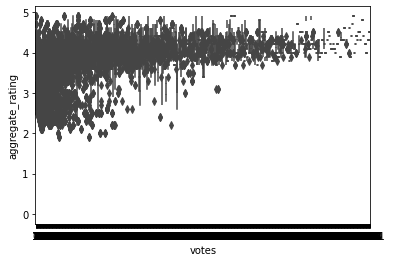

In [110]:
sns.boxplot(x='votes',y='aggregate_rating',data=data_for_boxplot)

Inference- 
        
    plotting the various boxplot to understand the relationship between the photo count, votes and their individual influence on the aggregate rating of the restaurant

### 4. The Mumbai city

consider the city mumbai and get a better insights of restuarants in Mumbai.

In [111]:
df_mum=data[data.city=='Mumbai']
df_mum.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,geometry,rating_text_new,region
134852,18562340,Drinkery 51,Casual Dining,https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,"Dinner, Debit Card, Lunch, Serves Alcohol, Cas...",4.4,Very Good,3796,1897,1,-1,POINT (72.86749 19.06718),excellent,west
134853,34757,Joeys Pizza,Quick Bites,https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,"Lunch, Cash, Takeaway Available, Debit Card, D...",4.5,Excellent,7932,4960,-1,-1,POINT (72.83467 19.17819),excellent,west
134854,18548172,Hitchki,Bar,https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.7,Excellent,3762,12979,1,-1,POINT (72.90733 19.11993),excellent,west
134855,18392725,Tamasha,Lounge,https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,"Dinner, Cash, Takeaway Available, Credit Card,...",4.7,Excellent,4979,16595,-1,-1,POINT (72.82750 19.00606),excellent,west
134856,18962112,Bayroute,Fine Dining,https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.9,Excellent,706,2484,-1,-1,POINT (72.82537 19.11068),excellent,west


Inference-

        Getting data only related to mumbai

**1. Expensive restaurants in Mumbai**

-  Define the costliest restaurants whose average cost of two people exceeds Rs.5000 .
-  Plot the restaurants which are costliest based on their average cost for two .




In [112]:
#costliest restaurants in Mumbai City
df_mum['name'][df_mum.average_cost_for_two>5000].reset_index(drop=True).head(15)

0                             Vista - Taj Lands End
1                       Souk - The Taj Mahal Palace
2         Wasabi By Morimoto - The Taj Mahal Palace
3                              Celini - Grand Hyatt
4               Masala Kraft - The Taj Mahal Palace
5                             San-Qi - Four Seasons
6                         Bombay High - ITC Maratha
7     Ocean - The Private Dining Room - Sahara Star
8         Wasabi By Morimoto - The Taj Mahal Palace
9                      Yuuka - The St. Regis Mumbai
10              Masala Kraft - The Taj Mahal Palace
11                             Celini - Grand Hyatt
12           Le Cirque Signature - The Leela Mumbai
13                            Vista - Taj Lands End
14                      Souk - The Taj Mahal Palace
Name: name, dtype: category
Categories (40965, object): ['# Wednesday', '#1, Culinary Avenue - The Red Maple', '#788 Avenue', '#BC', ..., 'ट 4 Tasty', 'द Vege टेबल', 'स्पेस Bar', 'ह-tea The Tea Hut']

In [113]:
#top 5 costliest restaurants in mumbai
top5_rest_in_mumbai=df_mum[['name','average_cost_for_two']].sort_values(by=['average_cost_for_two'],ascending=False).drop_duplicates().reset_index(drop=True).head(5)
top5_rest_in_mumbai

,name,average_cost_for_two
0,Ocean - The Private Dining Room - Sahara Star,30000
1,Wasabi By Morimoto - The Taj Mahal Palace,10000
2,Yuuka - The St. Regis Mumbai,8000
3,Masala Kraft - The Taj Mahal Palace,6500
4,Celini - Grand Hyatt,6000


Inference-

        getting the costliest  restaurants whose average cost of two people exceeds Rs.5000 .

<AxesSubplot:xlabel='name'>

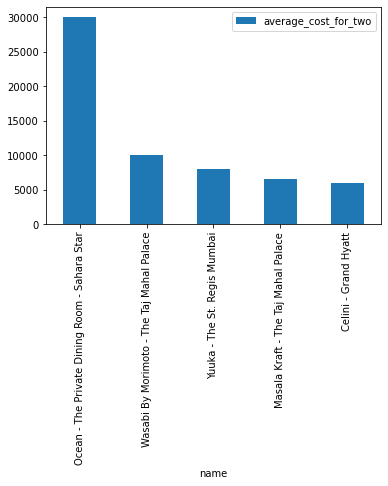

In [114]:
#plotting the graph
top5_rest_in_mumbai.plot.bar(x='name',y='average_cost_for_two')

Inference-

        plotting the values on graph for better understanding

**2.To find the top 20 cuisines of Mumbai**

- select unique cuisines available at restaurants in Mumbai


- sort cuisines based on frequency


In [115]:
mumbai_cuisines=frequency_calculator(df_mum['cuisines'])

Inference-

        getting the unique cuisine in Mumbai region

In [116]:
store_cuisine_inter_mum=[]

df_cuisine_mumbai=pd.DataFrame(mumbai_cuisines,columns=['Cuisines_Of_Mumbai'])
for i in mumbai_cuisines:
    store_cuisine_inter_mum.append(df_mum['cuisines'].str.count(i).sum())

df_cuisine_mumbai['frequency']=store_cuisine_inter_mum
df_cuisine_mumbai.sort_values(by=['frequency'],ascending=False).reset_index(drop=True).head(20)

,Cuisines_Of_Mumbai,frequency
0,Indian,2956
1,North Indian,2444
2,Chinese,1735
3,Continental,1516
4,Italian,1372
5,Fast Food,1271
6,Desserts,1207
7,Beverages,885
8,Asian,814
9,American,656


Inference-

        getting the frequency of the top 10 cuisines in the mumbai region

**3. To find the popular localities in Mumbai**

In [117]:
df_mum_local=df_mum[['locality']]
df_mum_local['locality'].value_counts().head(5)

Powai                                297
Andheri Lokhandwala, Andheri West    292
Malad West                           209
Borivali West                        202
Bandra Kurla Complex                 184
Name: locality, dtype: int64

Inference-

        getting the top5 popular localities in mumbai 

**4. Multiple box plot for photo_counts based on establishment type.**



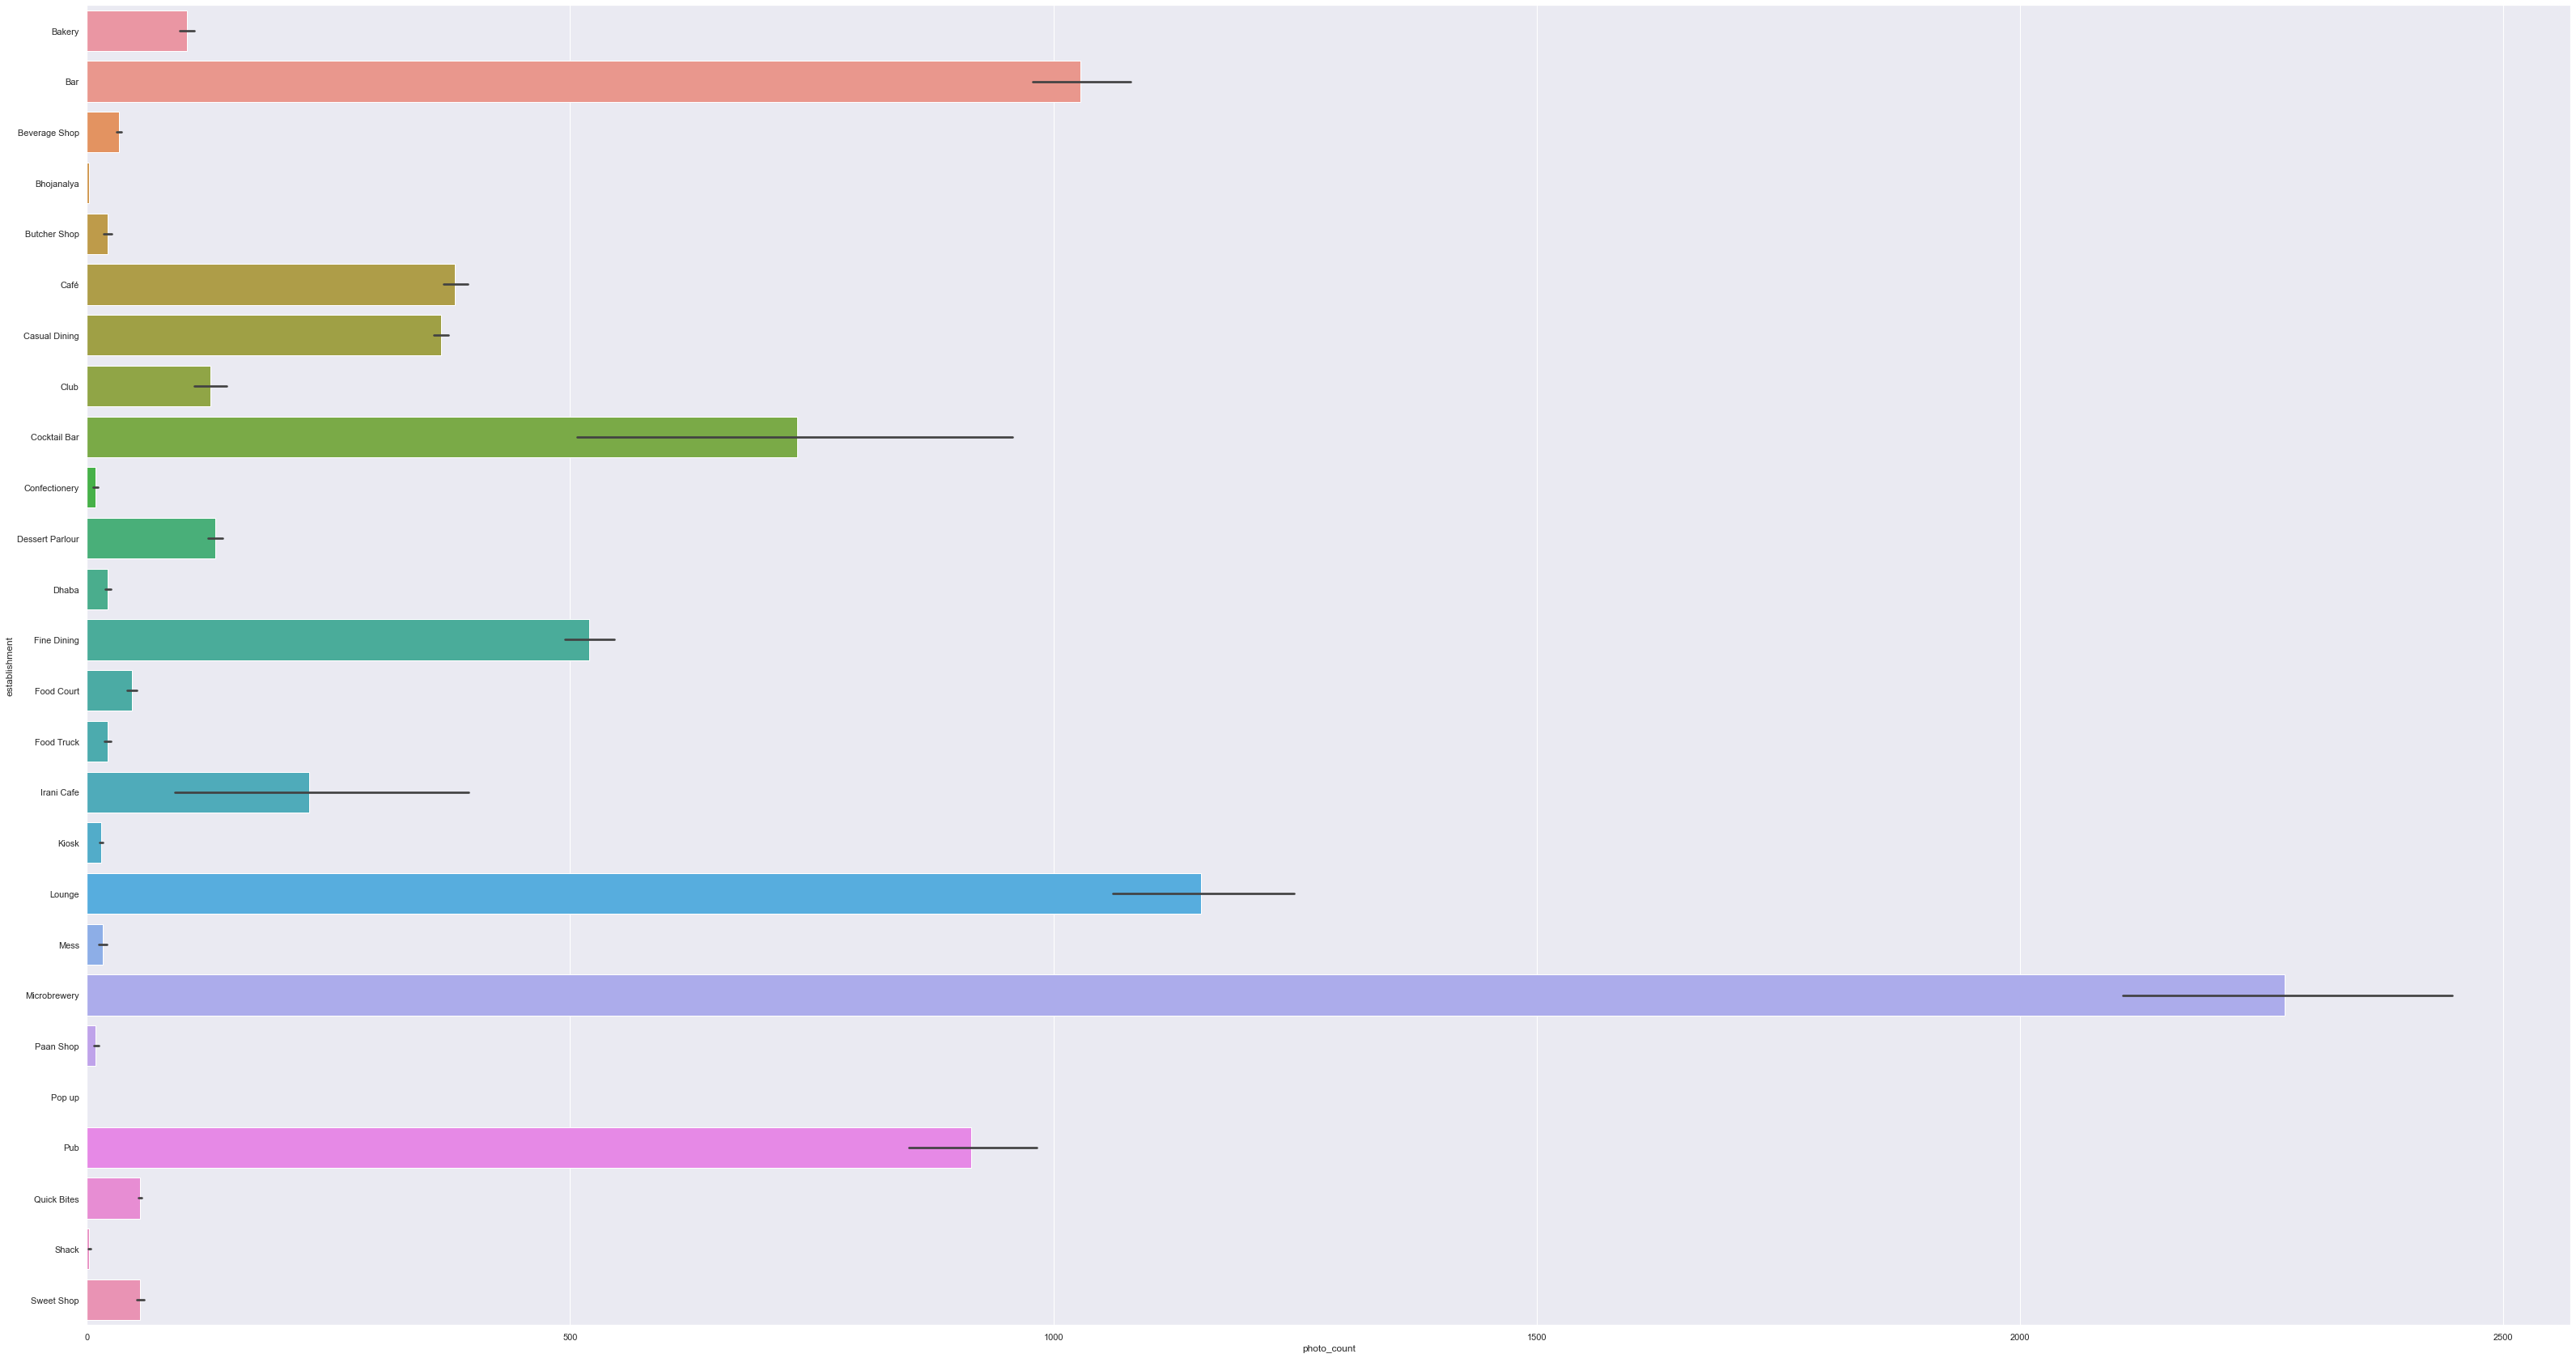

In [130]:
sns.barplot(x='photo_count',y='establishment',data=data)
sns.set(rc={'figure.figsize':(55,20)})

Inference-

        plotting bar plot for the photo counts and the type of establishment

In [143]:
df_highlights.sort_values(by='Frequency',ascending=False)

,Facility_Provided,Frequency
100,Cash,203036.0
93,Takeaway Available,180942.0
102,Indoor Seating,175396.0
50,Dinner,169291.0
31,Lunch,165545.0
...,...,...
29,Members Only,4.0
77,Subscription Available,3.0
39,Subscription Required,3.0
8,Bira 91 Beer,2.0


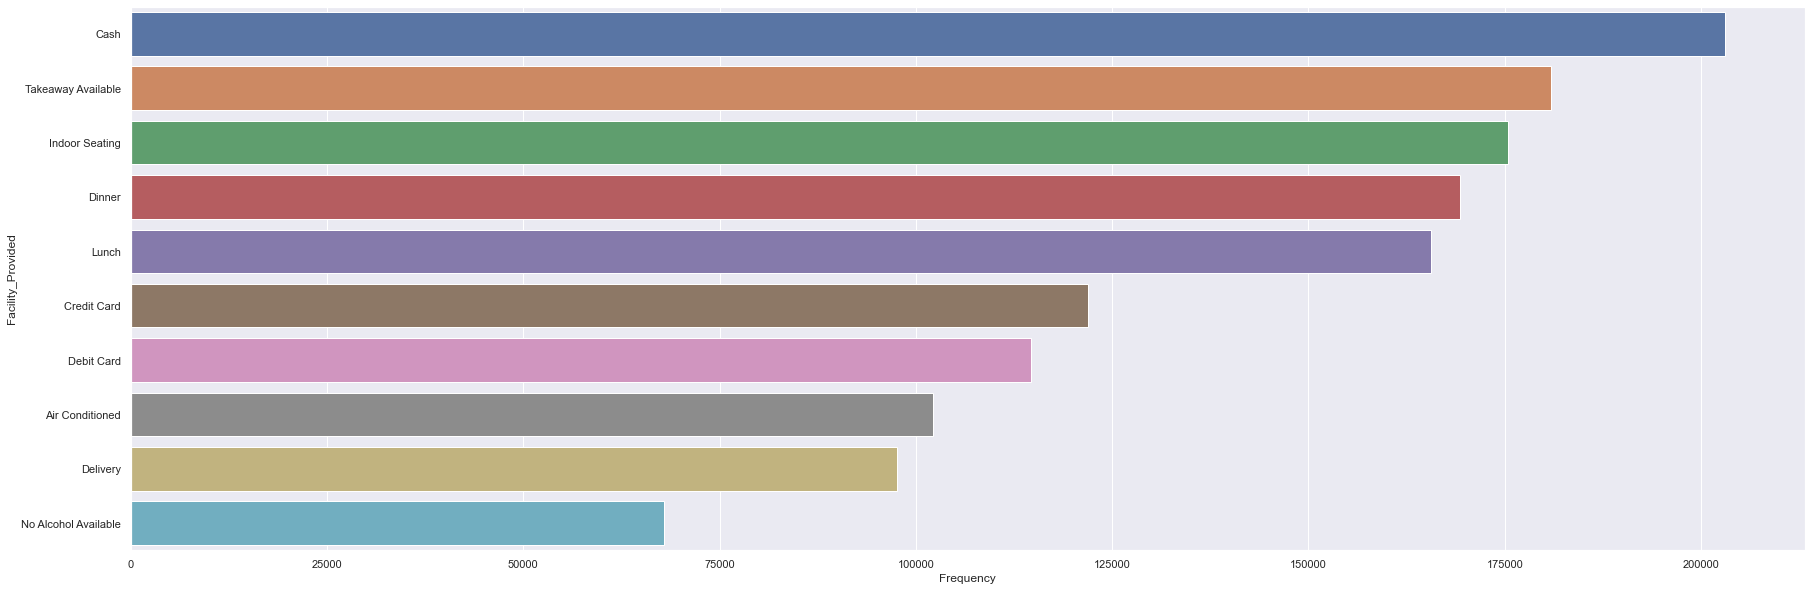

In [145]:
sns.barplot(x='Frequency',y='Facility_Provided',data=df_highlights.sort_values(by='Frequency',ascending=False).head(10))
sns.set(rc={'figure.figsize':(30,10)})

Inference-

        getting the unique facilities in the western region  
        sorting it wrt the frequency by which they are used


# THANK YOU

# - DARSHAN GANDHI

